In [61]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression


In [62]:
train_df = pd.read_csv('/content/drive/MyDrive/titanicc/train (1).csv')
test_df = pd.read_csv('/content/drive/MyDrive/titanicc/test (1).csv')
combine = [train_df, test_df]

In [63]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [65]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
train_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",male,1601,G6,S
freq,1,577,7,4,644


In [67]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [68]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [69]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [70]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


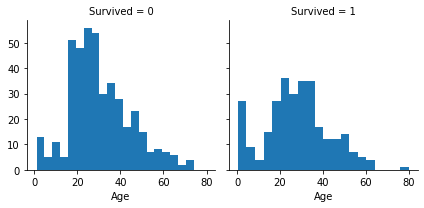

In [71]:
ageSurv = sns.FacetGrid(train_df, col='Survived')
ageSurv.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


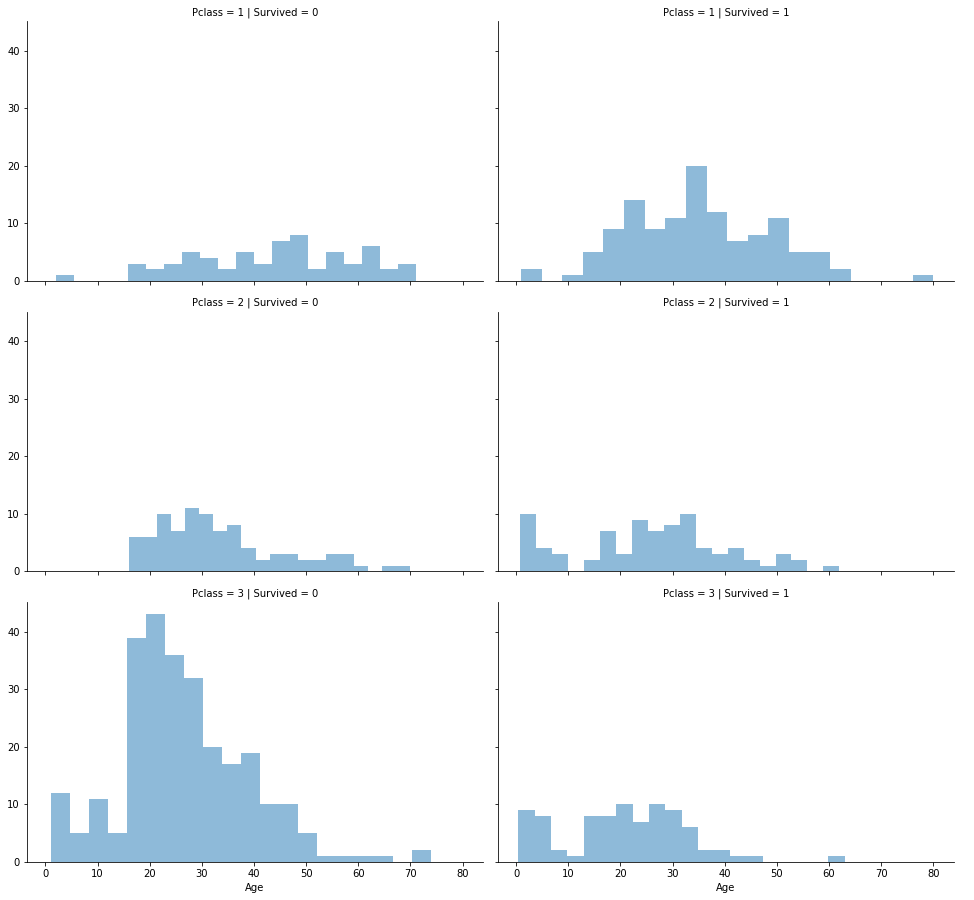

In [72]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=4.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [73]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]


In [74]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [75]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [76]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [77]:
train_df= train_df.drop(['Name','PassengerId'],axis=1)
test_df= test_df.drop(['Name'],axis=1)
combine= [train_df, test_df]

In [78]:
for dataset in combine:
  dataset['Sex']= dataset['Sex'].map({'male':0,'female':1}).astype(int)
train_df.head()  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [79]:
train_df['AgeBand']= pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [80]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [81]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1


In [82]:
for dataset in combine:
  dataset['FamilySize']= dataset['SibSp']+dataset['Parch']+1
  dataset['IsAlone']=0
  dataset.loc[dataset['FamilySize']==1, 'IsAlone']=1

In [83]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,7.2500,S,1,0
1,1,1,1,2.0,71.2833,C,3,0
2,1,3,1,1.0,7.9250,S,2,1
3,1,1,1,2.0,53.1000,S,3,0
4,0,3,0,2.0,8.0500,S,1,1


In [84]:
for dataset in combine:
  dataset['Age'].fillna(dataset['Age'].dropna().median(),inplace=True)

In [85]:
combine=[train_df,test_df]
train_df.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
886,0,2,0,1.0,13.00,S,5,1
887,1,1,1,1.0,30.00,S,2,1
888,0,3,1,1.0,23.45,S,2,0
889,1,1,0,1.0,30.00,C,1,1
890,0,3,0,1.0,7.75,Q,1,1


In [86]:
train_df['Age']= train_df['Age'].astype(int)
test_df['Age']= test_df['Age'].astype(int)
combine=[train_df,test_df]

In [87]:
train_df= train_df.drop(['Embarked'],axis=1)
test_df= test_df.drop(['Embarked'],axis=1)

In [88]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Title,IsAlone
0,0,3,0,1,7.2500,1,0
1,1,1,1,2,71.2833,3,0
2,1,3,1,1,7.9250,2,1
3,1,1,1,2,53.1000,3,0
4,0,3,0,2,8.0500,1,1


In [89]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Title,IsAlone
0,892,3,0,2,7.8292,1,1
1,893,3,1,2,7.0000,3,0
2,894,2,0,3,9.6875,1,1
3,895,3,0,1,8.6625,1,1
4,896,3,1,1,12.2875,3,0


In [94]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)
combine=[train_df,test_df]
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Title,IsAlone
0,892,3,0,2,7.8292,1,1
1,893,3,1,2,7.0000,3,0
2,894,2,0,3,9.6875,1,1
3,895,3,0,1,8.6625,1,1
4,896,3,1,1,12.2875,3,0


In [95]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [96]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Title,IsAlone
0,0,3,0,1,0,1,0
1,1,1,1,2,3,3,0
2,1,3,1,1,1,2,1
3,1,1,1,2,3,3,0
4,0,3,0,2,1,1,1
5,0,3,0,1,1,1,1
6,0,1,0,3,3,1,1
7,0,3,0,0,2,4,0
8,1,3,1,1,1,3,0
9,1,2,1,0,2,3,0


In [99]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [100]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.0

In [101]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.192079
4,Title,0.413513
5,IsAlone,0.044462
2,Age,-0.030955
3,Fare,-0.068783
0,Pclass,-0.995186


In [103]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) , 2)
acc_svc

0.78